In [69]:
#import library

from time import sleep
from json import dumps
from pymongo import MongoClient
from json import loads
import requests
import ast
import pymongo
import pandas as pd
import datetime
import time
import io
import json
import warnings 
warnings.filterwarnings("ignore")

In [70]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from numpy import mean
from matplotlib.axis import Axis
import matplotlib.transforms as mt

In [71]:
url_df_fin = 'https://github.com/NightSkimmi/partite_nba_completo/blob/main/data_finale.csv?raw=true'
df_finale = pd.read_csv(url_df_fin, sep = ',', encoding='latin-1')
df_finale.sort_values('date')

,Unnamed: 0,_id,TEAM_ID_home,teamHome,GAME_ID,date,PTS_home,FG_PCT_home,FG3_PCT_home,FT_PCT_home,...,FG3_PCT_away,FT_PCT_away,REB_away,AST_away,WIN,Unnamed: 0.1,attendance,Arena,Arena_capacity,%_Capienza_occupata
0,0,62cf1dce06bed7044584669a,1610612752,New York Knicks,20000001,2000-10-31,72,0.357,0.273,0.792,...,0.375,0.733,37,27,Away team,28161,0.0,Madison Square Garden,19812.0,0.000000
1,1,62cf1dce06bed7044584669b,1610612771,New Jersey Nets,20000002,2000-10-31,82,0.365,0.300,0.654,...,0.286,0.625,52,16,Away team,28160,14505.0,Izod Center,20049.0,72.347748
2,2,62cf1dce06bed7044584669c,1610612753,Orlando Magic,20000003,2000-10-31,97,0.430,0.375,0.697,...,0.571,0.667,44,20,Home team,28162,13349.0,Amway Center,18846.0,70.832007
3,3,62cf1dce06bed7044584669d,1610612737,Atlanta Hawks,20000004,2000-10-31,82,0.370,0.400,0.762,...,0.556,0.775,44,16,Away team,28155,18465.0,State Farm Arena,18729.0,98.590421
4,4,62cf1dce06bed7044584669e,1610612761,Toronto Raptors,20000005,2000-10-31,95,0.376,0.294,0.645,...,0.250,0.722,45,21,Away team,28165,19800.0,Scotiabank Arena,19800.0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28150,28150,62cf1dce06bed7044584d490,1610612767,Golden State Warriors,42100402,2022-06-05,107,0.453,0.405,0.700,...,0.405,0.765,43,24,Home team,4,18064.0,Chase Center,18064.0,100.000000
28151,28151,62cf1dce06bed7044584d491,1610612738,Boston Celtics,42100403,2022-06-08,116,0.483,0.371,0.708,...,0.375,0.867,31,22,Home team,3,19156.0,TD Garden,19156.0,100.000000
28152,28152,62cf1dce06bed7044584d492,1610612738,Boston Celtics,42100404,2022-06-10,97,0.400,0.395,0.737,...,0.349,0.800,55,20,Away team,2,19156.0,TD Garden,19156.0,100.000000
28153,28153,62cf1dce06bed7044584d493,1610612767,Golden State Warriors,42100405,2022-06-13,104,0.466,0.225,0.867,...,0.344,0.677,47,18,Home team,1,18064.0,Chase Center,18064.0,100.000000


In [72]:
df_finale.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df_finale.columns

Index(['_id', 'TEAM_ID_home', 'teamHome', 'GAME_ID', 'date', 'PTS_home',
       'FG_PCT_home', 'FG3_PCT_home', 'FT_PCT_home', 'REB_home', 'AST_home',
       'Season', 'Tipo_partita', 'TEAM_ID_away', 'teamAway', 'PTS_away',
       'FG_PCT_away', 'FG3_PCT_away', 'FT_PCT_away', 'REB_away', 'AST_away',
       'WIN', 'Unnamed: 0.1', 'attendance', 'Arena', 'Arena_capacity',
       '%_Capienza_occupata'],
      dtype='object')

## Histograms of most important variables

### Capienza occupata

In [ ]:
x = df_finale['%_Capienza_occupata']

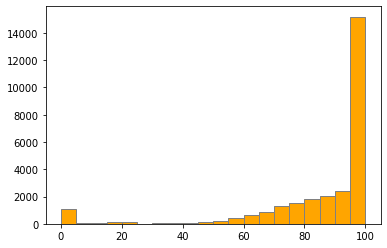

In [ ]:
plt.hist(x, bins=20, ec='grey', fc='orange') #every 5 percent
plt.show();

### Hanno vinto più partite in casa o in trasferta?

In [ ]:
y = df_finale['WIN']
y

0        Away team
1        Away team
2        Home team
3        Away team
4        Away team
           ...    
28163    Home team
28164    Home team
28165    Home team
28166    Away team
28167    Away team
Name: WIN, Length: 28168, dtype: object

ValueError: ignored

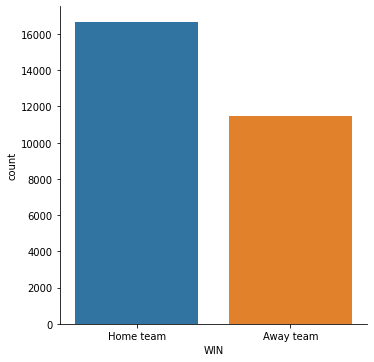

In [ ]:
sns.catplot(df_finale['WIN'], kind="count", data=df_finale, order=('Home team', 'Away team'));

In [ ]:
playoff=df_finale[df_finale['Tipo_partita']=='Playoff']

ValueError: ignored

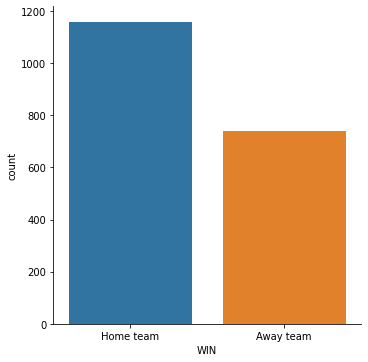

In [ ]:
sns.catplot(playoff['WIN'], kind="count", data=playoff);

In [ ]:
regular=df_finale[df_finale['Tipo_partita']=='Regular Season']

ValueError: ignored

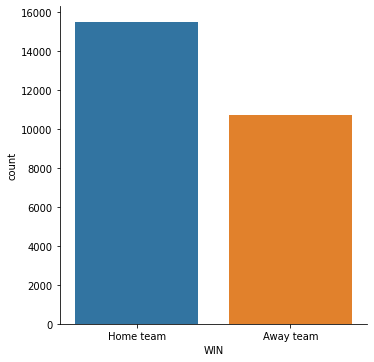

In [ ]:
sns.catplot(regular['WIN'], kind="count", data=regular,order=('Home team', 'Away team'));

In [ ]:
perc_vitt_reg.columns

Index(['_id', 'TEAM_ID_home', 'teamHome', 'GAME_ID', 'date', 'PTS_home',
       'FG_PCT_home', 'FG3_PCT_home', 'FT_PCT_home', 'REB_home', 'AST_home',
       'Season', 'Tipo_partita', 'TEAM_ID_away', 'teamAway', 'PTS_away',
       'FG_PCT_away', 'FG3_PCT_away', 'FT_PCT_away', 'REB_away', 'AST_away',
       'WIN', 'attendance', 'Arena', 'Arena_capacity', '%_Capienza_occupata'],
      dtype='object')

In [ ]:
perc_vitt_reg=regular[regular['WIN']=='Home team']

In [ ]:
(len(perc_vitt_reg)/len(regular))*100

59.13122929912057

In [ ]:
perc_vitt_play=playoff[playoff['WIN']=='Home team']

In [ ]:
(len(perc_vitt_play)/len(playoff))*100

61.02051551814834

In [ ]:
mean(perc_vitt_reg['%_Capienza_occupata'])

87.47733989426625

In [ ]:
mean(perc_vitt_play['%_Capienza_occupata'])

81.64231740540593

In [ ]:
mean(regular['%_Capienza_occupata'])

86.62590886884469

In [ ]:
mean(playoff['%_Capienza_occupata'])

79.59124499059625

### Giocare in casa influenza i valori delle statistiche?

###### Boston Celtics

In [ ]:
celtics_home = df_finale[df_finale['teamHome']=='Boston Celtics'][['teamHome','WIN']]

celtics_away = df_finale[df_finale['teamAway']=='Boston Celtics'][['teamAway','WIN']]


In [ ]:
celtics_home.drop(celtics_home.loc[celtics_home['WIN']=='Away team'].index, inplace = True)

In [ ]:
celtics_away.drop(celtics_away.loc[celtics_away['WIN']=='Home team'].index, inplace = True)

In [ ]:
celtics = pd.concat([celtics_home,celtics_away])
celtics

,teamHome,WIN,teamAway
13,Boston Celtics,Home team,NaN
27,Boston Celtics,Home team,NaN
110,Boston Celtics,Home team,NaN
125,Boston Celtics,Home team,NaN
158,Boston Celtics,Home team,NaN
...,...,...,...
28122,NaN,Away team,Boston Celtics
28138,NaN,Away team,Boston Celtics
28141,NaN,Away team,Boston Celtics
28143,NaN,Away team,Boston Celtics


ValueError: ignored

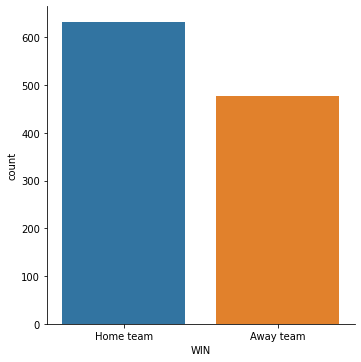

In [ ]:
sns.catplot(celtics['WIN'], kind="count", data=celtics,order=('Home team', 'Away team'), orient = 'v').set(title='Boston Celtics');

##### Philadelphia 76ers

In [ ]:
phi_home = df_finale[df_finale['teamHome']=='Philadelphia 76ers'][['teamHome','WIN', 'GAME_ID']]
phi_away = df_finale[df_finale['teamAway']=='Philadelphia 76ers'][['teamAway','WIN','GAME_ID']]


In [ ]:
phi_home.drop(phi_home.loc[phi_home['WIN']=='Away team'].index, inplace = True)

In [ ]:
phi_away.drop(phi_away.loc[phi_away['WIN']=='Home team'].index, inplace = True)

In [ ]:
phi = pd.concat([phi_home,phi_away])
phi

,teamHome,WIN,GAME_ID,teamAway
14,Philadelphia 76ers,Home team,20000015,NaN
61,Philadelphia 76ers,Home team,20000062,NaN
87,Philadelphia 76ers,Home team,20000088,NaN
112,Philadelphia 76ers,Home team,20000113,NaN
126,Philadelphia 76ers,Home team,20000127,NaN
...,...,...,...,...
27985,NaN,Away team,42000103,Philadelphia 76ers
28028,NaN,Away team,42000203,Philadelphia 76ers
28031,NaN,Away team,42000206,Philadelphia 76ers
28084,NaN,Away team,42100133,Philadelphia 76ers


In [ ]:
sns.set_palette("pastel")

ValueError: ignored

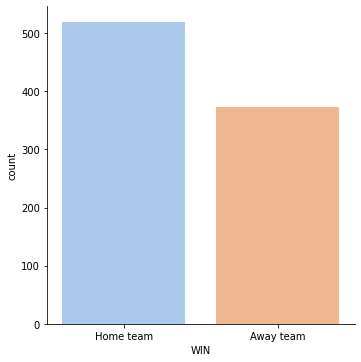

In [ ]:
sns.catplot(phi['WIN'], kind="count", data=phi,order=('Home team', 'Away team'), orient = 'v').set(title= 'Philadelphia 76ers');

###### San Antonio Spurs

In [ ]:
sas_home = df_finale[df_finale['teamHome']=='San Antonio Spurs'][['teamHome','WIN', 'GAME_ID']]
sas_away = df_finale[df_finale['teamAway']=='San Antonio Spurs'][['teamAway','WIN','GAME_ID']]

In [ ]:
sas_home.drop(sas_home.loc[sas_home['WIN']=='Away team'].index, inplace = True)

In [ ]:
sas_away.drop(sas_away.loc[sas_away['WIN']=='Home team'].index, inplace = True)

In [ ]:
sas = pd.concat([sas_home,sas_away])
sas

In [ ]:
sns.set_palette("pastel")

In [ ]:
sns.catplot(sas['WIN'], kind="count", data=sas,order=('Home team', 'Away team'), orient = 'v').set(title= 'San Antonio Spurs');

### Correlazioni

In [73]:
df_finale["TEAM_ID_home"]=df_finale["TEAM_ID_home"].apply(str)
df_finale["GAME_ID"]=df_finale["GAME_ID"].apply(str)
df_finale["TEAM_ID_away"]=df_finale["TEAM_ID_away"].apply(str)

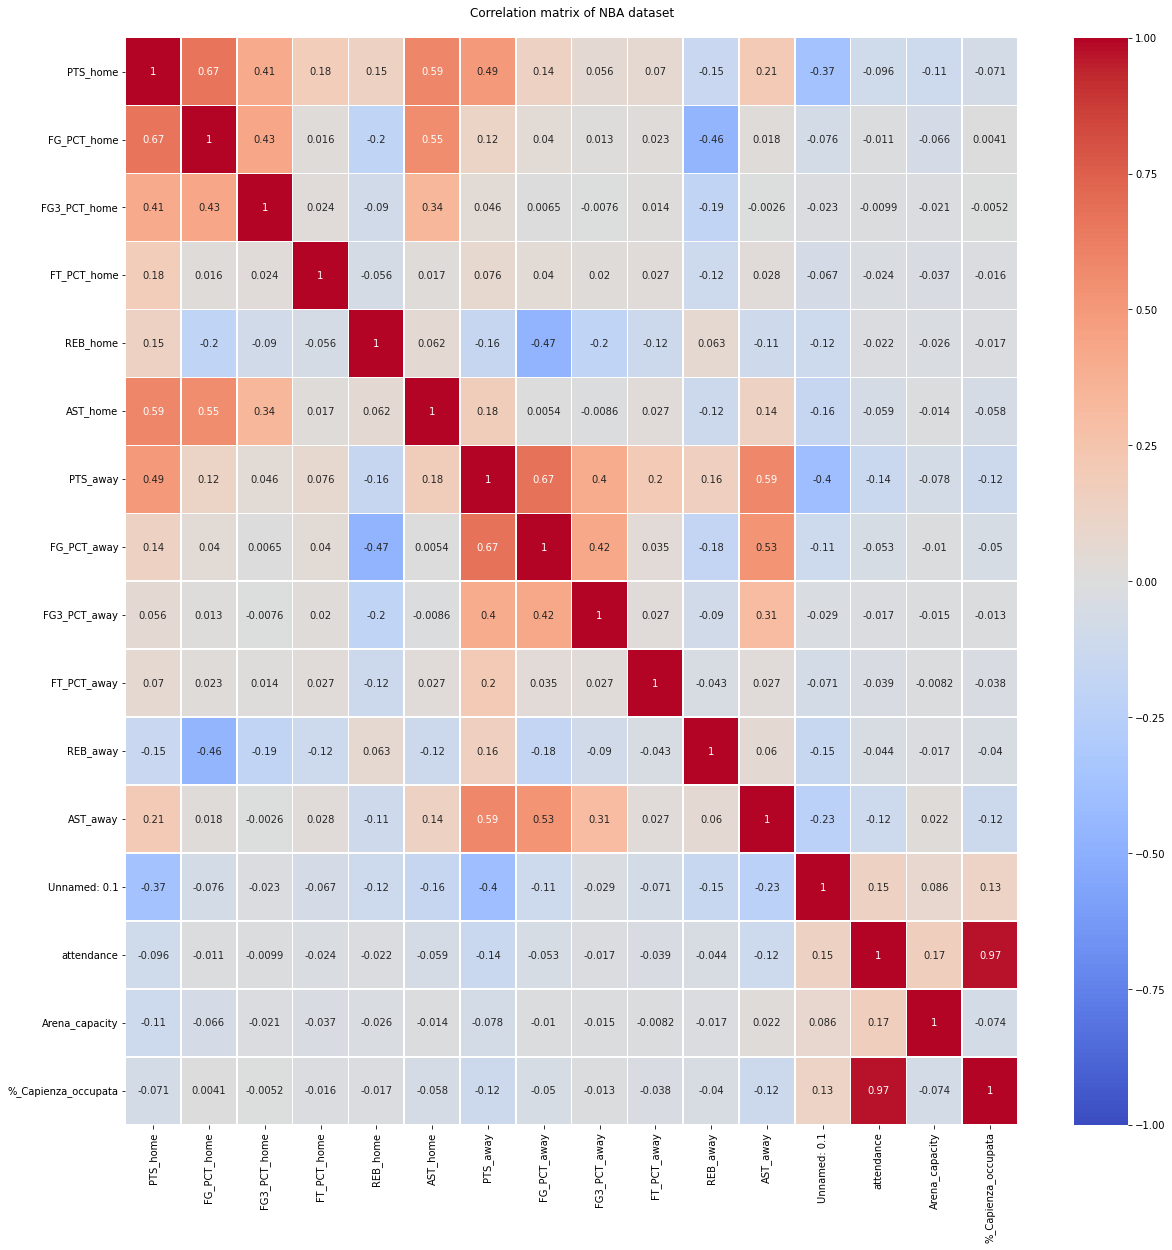

<Figure size 432x288 with 0 Axes>

In [74]:
fig, ax = plt.subplots(figsize=(20,20)) 
hm = sns.heatmap(df_finale.corr(), annot = True, linewidths=.5, vmin=-1, vmax=1, cmap="coolwarm")

hm.set(title = "Correlation matrix of NBA dataset\n")

plt.show()
plt.savefig("Corre.png");

In [ ]:
df_2005 = df_finale.query("Season == '2005-06'")
df_2020 = df_finale.query("Season == '2020-21'")

In [ ]:
df1 = df_2005['%_Capienza_occupata']
df2 = df_2020['%_Capienza_occupata']

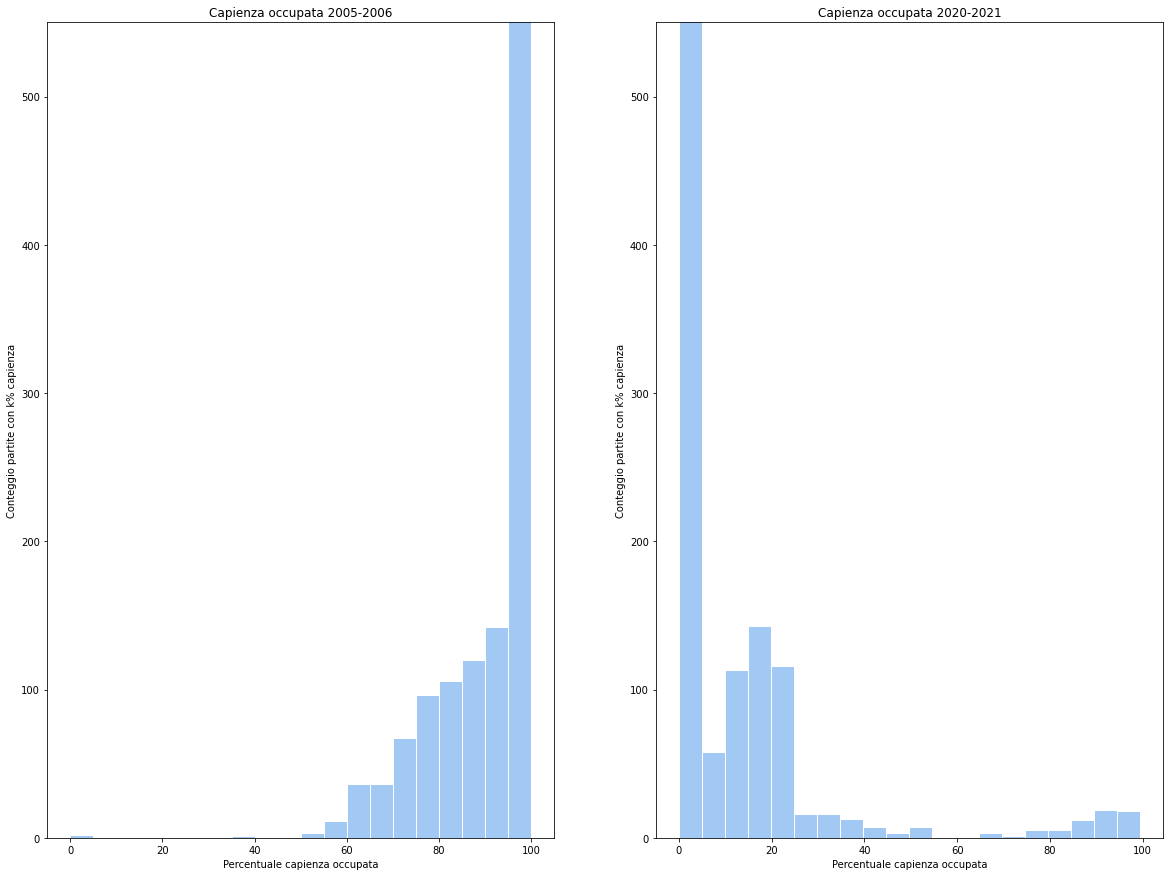

In [ ]:
fig, ax = plt.subplots(figsize=(20,15)) 
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.hist(df1, bins=20, ec = "white")
plt.title("Capienza occupata 2005-2006")
plt.xlabel('Percentuale capienza occupata')
plt.ylabel('Conteggio partite con k% capienza')
plt.ylim([0, 550])

plt.subplot(1, 2, 2) # index 2
plt.hist(df2, bins=20, ec = "white")
plt.title("Capienza occupata 2020-2021")
plt.xlabel('Percentuale capienza occupata')
plt.ylabel('Conteggio partite con k% capienza')
plt.ylim([0, 550])


plt.savefig("Plot.png")

In [ ]:
Stagioni=["00-01",
         "01-02",
         "02-03",
         "03-04",
         "04-05",
         "05-06",
         "06-07",
         "07-08",
         "08-09",
         "09-10",
         "10-11",
         "11-12",
         "12-13",
         "13-14",
         "14-15",
         "15-16",
         "16-17",
         "17-18",
         "18-19",
         "19-20",
         "20-21",
         "21-22"]

In [ ]:
#Analisi andamento spettatori

In [ ]:
golden=df_finale[df_finale['teamHome']=='Golden State Warriors']

In [ ]:
miami=df_finale[df_finale['teamHome']=='Miami Heat']

In [ ]:
clev=df_finale[df_finale['teamHome']=='Cleveland Cavaliers']

In [ ]:
spet_gold=golden.groupby('Season').sum()['attendance']/1000
spet_gold[21]

957.392

In [ ]:
spet_mia=miami.groupby('Season').sum()['attendance']/1000

In [ ]:
spet_clev=clev.groupby('Season').sum()['attendance']/1000

In [ ]:
import matplotlib.transforms as mt

In [ ]:
mw=['11-12','12-13']
gsw=['14-15','16-17','17-18']
cw=["15-16"]

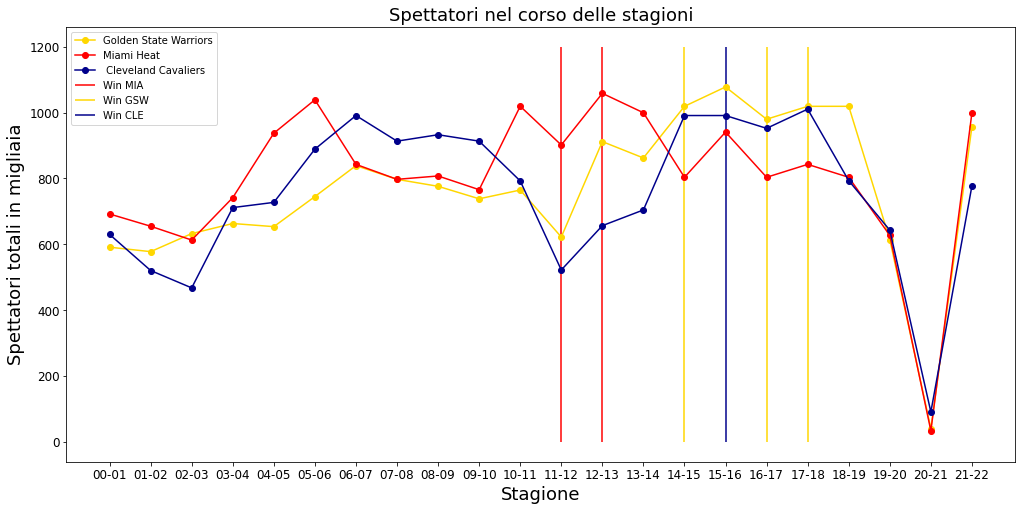

In [ ]:
fig = plt.figure(figsize=(17, 8))
plt.plot_date(Stagioni, spet_gold,linestyle ='solid', color='gold',label='Golden State Warriors')
plt.plot_date(Stagioni, spet_mia,linestyle ='solid', color= 'red', label='Miami Heat')
plt.plot_date(Stagioni, spet_clev,linestyle ='solid', color='darkblue', label=' Cleveland Cavaliers')
plt.xlabel("Stagione",fontsize=18)
plt.ylabel("Spettatori totali in migliaia",fontsize=18)
plt.title("Spettatori nel corso delle stagioni", fontsize=18)
plt.vlines(mw,ymin=0, ymax=1200, linewidth=1.5, color='red',label='Win MIA')
plt.vlines(gsw,ymin=0, ymax=1200, linewidth=1.5, color='gold',label='Win GSW')
plt.vlines(cw,ymin=0, ymax=1200, linewidth=1.5, color='darkblue',label='Win CLE')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.savefig('Spettatori stagioni')

In [ ]:
## Punti medi di tutte le squadre divise per partite in casa e in trasferta'

In [ ]:
df_meanpoints = df_finale.groupby(['Season']).mean()

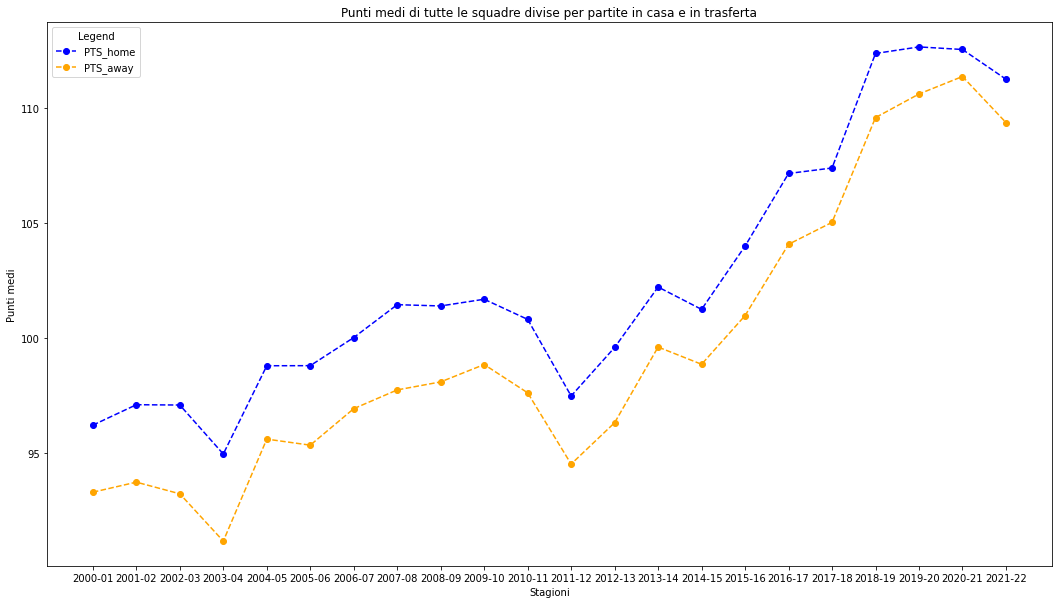

In [ ]:
fig, ax = plt.subplots(figsize=(18,10)) 
plt.plot(df_meanpoints['PTS_home'], linestyle='--', marker='o', color='blue')
plt.plot(df_meanpoints['PTS_away'], linestyle='--', marker='o', color= 'orange')
plt.title('Punti medi di tutte le squadre divise per partite in casa e in trasferta')
plt.xlabel('Stagioni')
plt.ylabel('Punti medi')
legend = plt.legend(['PTS_home','PTS_away'], title = "Legend")

In [ ]:
df_meanpoints_persquadra = df_finale.groupby(['teamHome', 'Season'], as_index=False).mean()

In [ ]:
toronto_raptors = df_meanpoints_persquadra[df_meanpoints_persquadra['teamHome'] == 'Toronto Raptors']
phoenix_suns = df_meanpoints_persquadra[df_meanpoints_persquadra['teamHome'] == 'Phoenix Suns']
denver_nuggets = df_meanpoints_persquadra[df_meanpoints_persquadra['teamHome'] == 'Denver Nuggets']

In [ ]:
### PUNTI

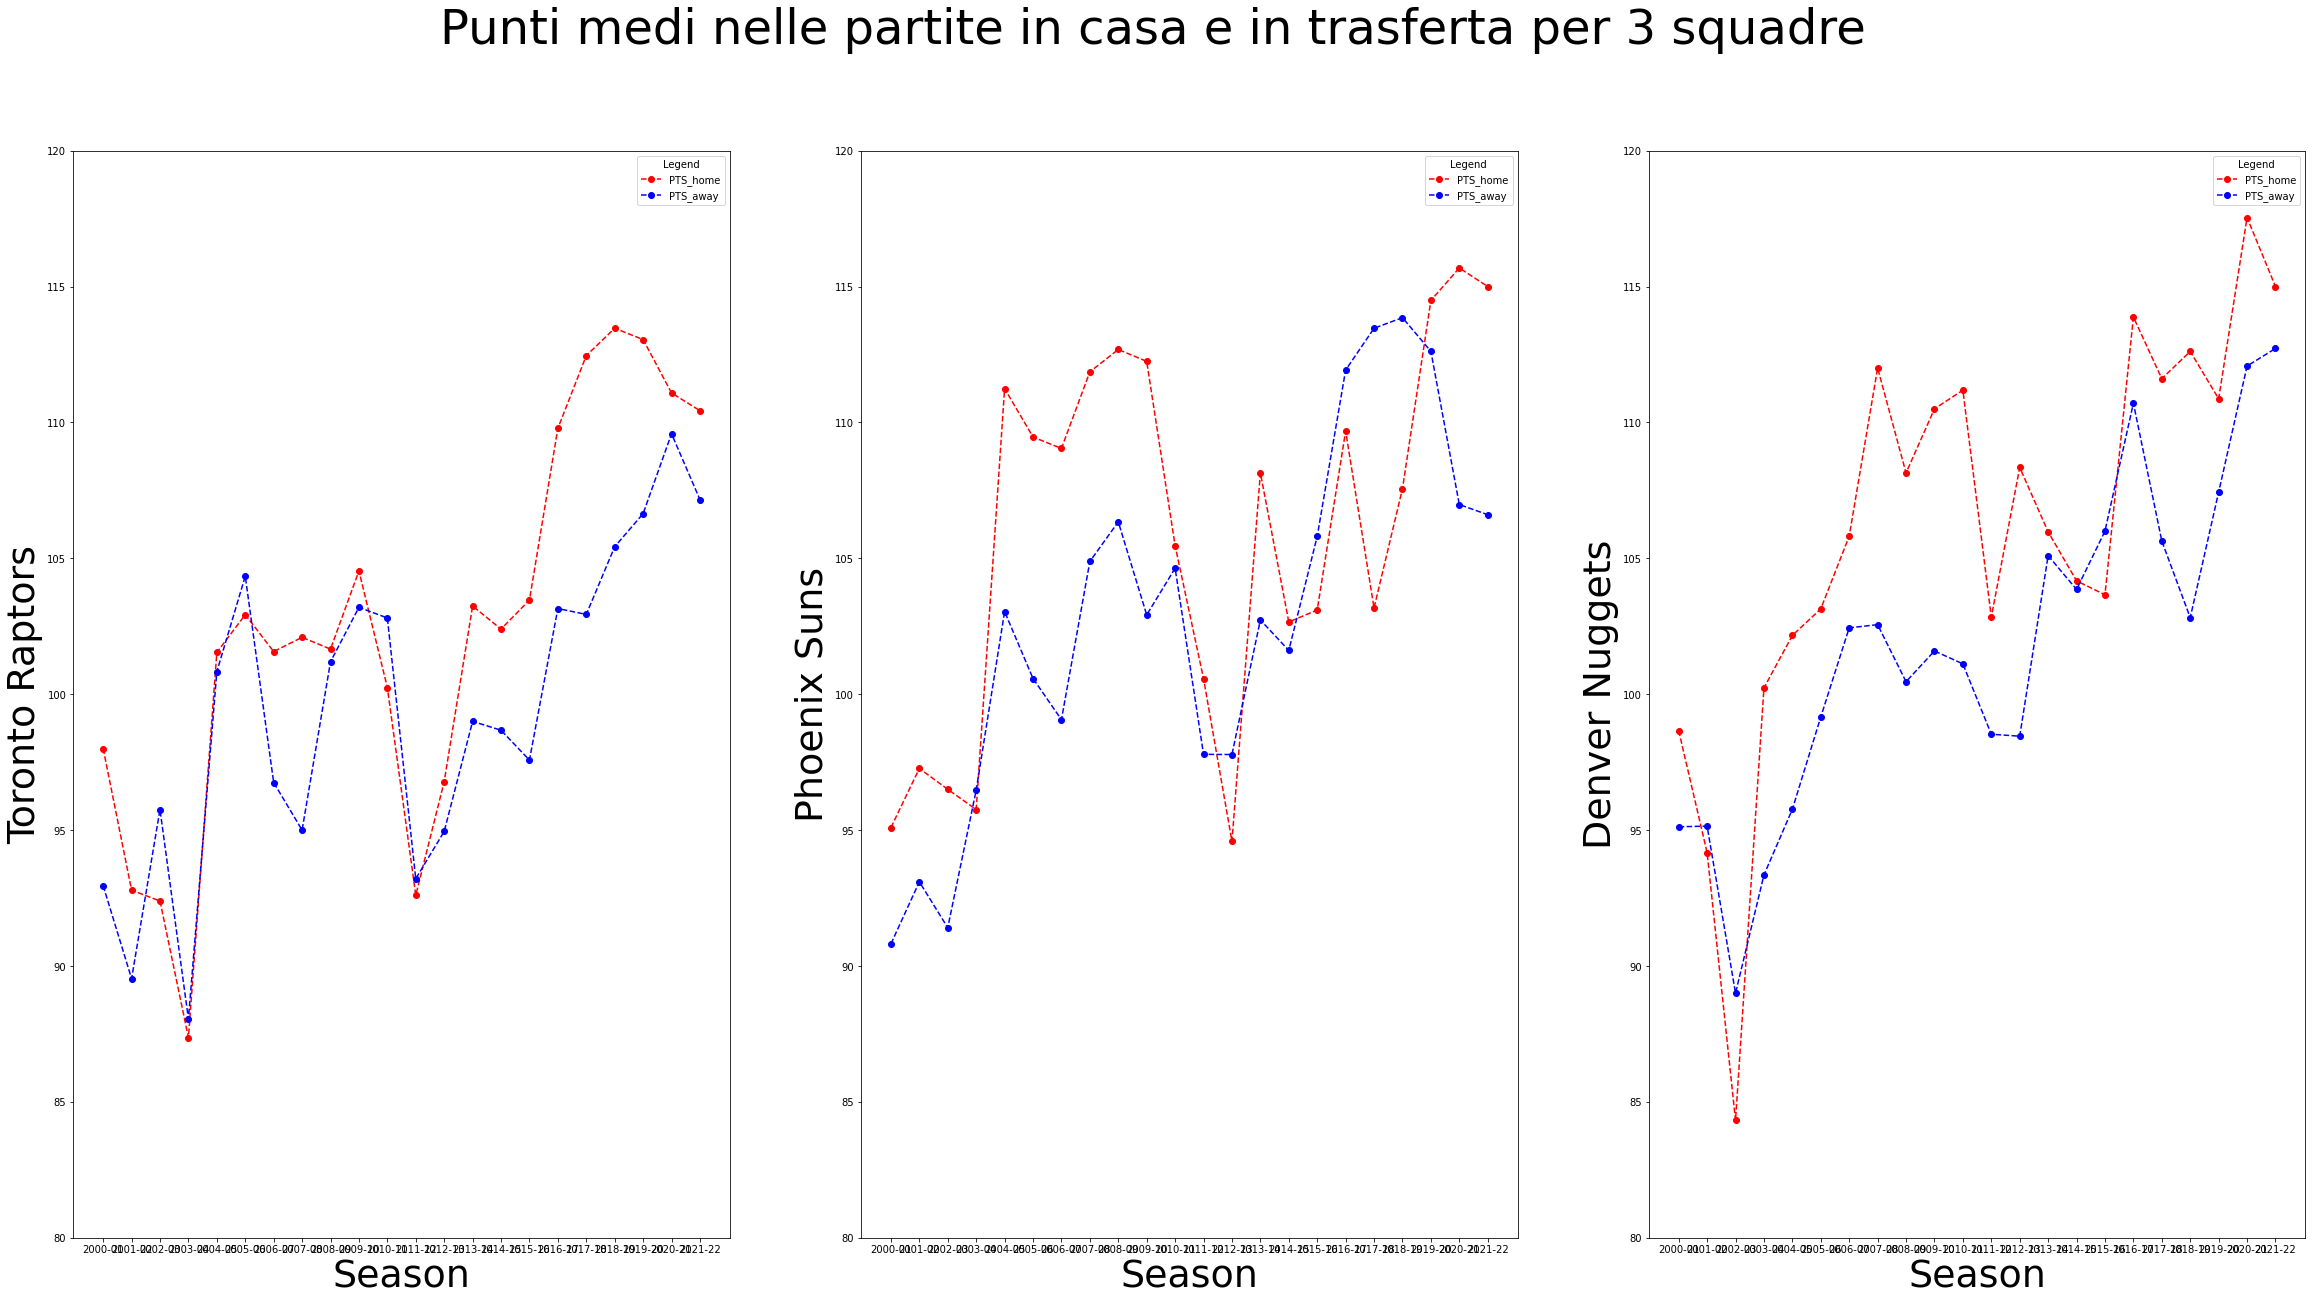

In [ ]:
fig, ax = plt.subplots(figsize=(40,20))
plt.subplot(1, 3, 1)
plt.plot(toronto_raptors['Season'], toronto_raptors['PTS_home'], linestyle='--', marker='o', color='red')
plt.plot(toronto_raptors['Season'], toronto_raptors['PTS_away'], linestyle='--', marker='o', color= 'blue')
legend = plt.legend(['PTS_home','PTS_away'], title = "Legend")
plt.ylabel('Toronto Raptors', fontsize=38)
plt.xlabel('Season', fontsize=38)
plt.ylim([80, 120])

plt.subplot(1, 3, 2)
plt.plot(phoenix_suns['Season'], phoenix_suns['PTS_home'], linestyle='--', marker='o', color='red')
plt.plot(phoenix_suns['Season'], phoenix_suns['PTS_away'], linestyle='--', marker='o', color= 'blue')
legend = plt.legend(['PTS_home','PTS_away'], title = "Legend")
plt.ylabel('Phoenix Suns', fontsize=38)
plt.xlabel('Season', fontsize=38)
plt.ylim([80, 120])

plt.subplot(1, 3, 3)
plt.plot(denver_nuggets['Season'], denver_nuggets['PTS_home'], linestyle='--', marker='o', color='red')
plt.plot(denver_nuggets['Season'], denver_nuggets['PTS_away'], linestyle='--', marker='o', color= 'blue')
legend = plt.legend(['PTS_home','PTS_away'], title = "Legend")
plt.ylabel('Denver Nuggets', fontsize=38)
plt.xlabel('Season', fontsize=38)
plt.ylim([80, 120])

fig.suptitle('Punti medi nelle partite in casa e in trasferta per 3 squadre', fontsize=48)
plt.savefig("Punti per 3 squadre.png")



In [ ]:
### FG3_ PCT

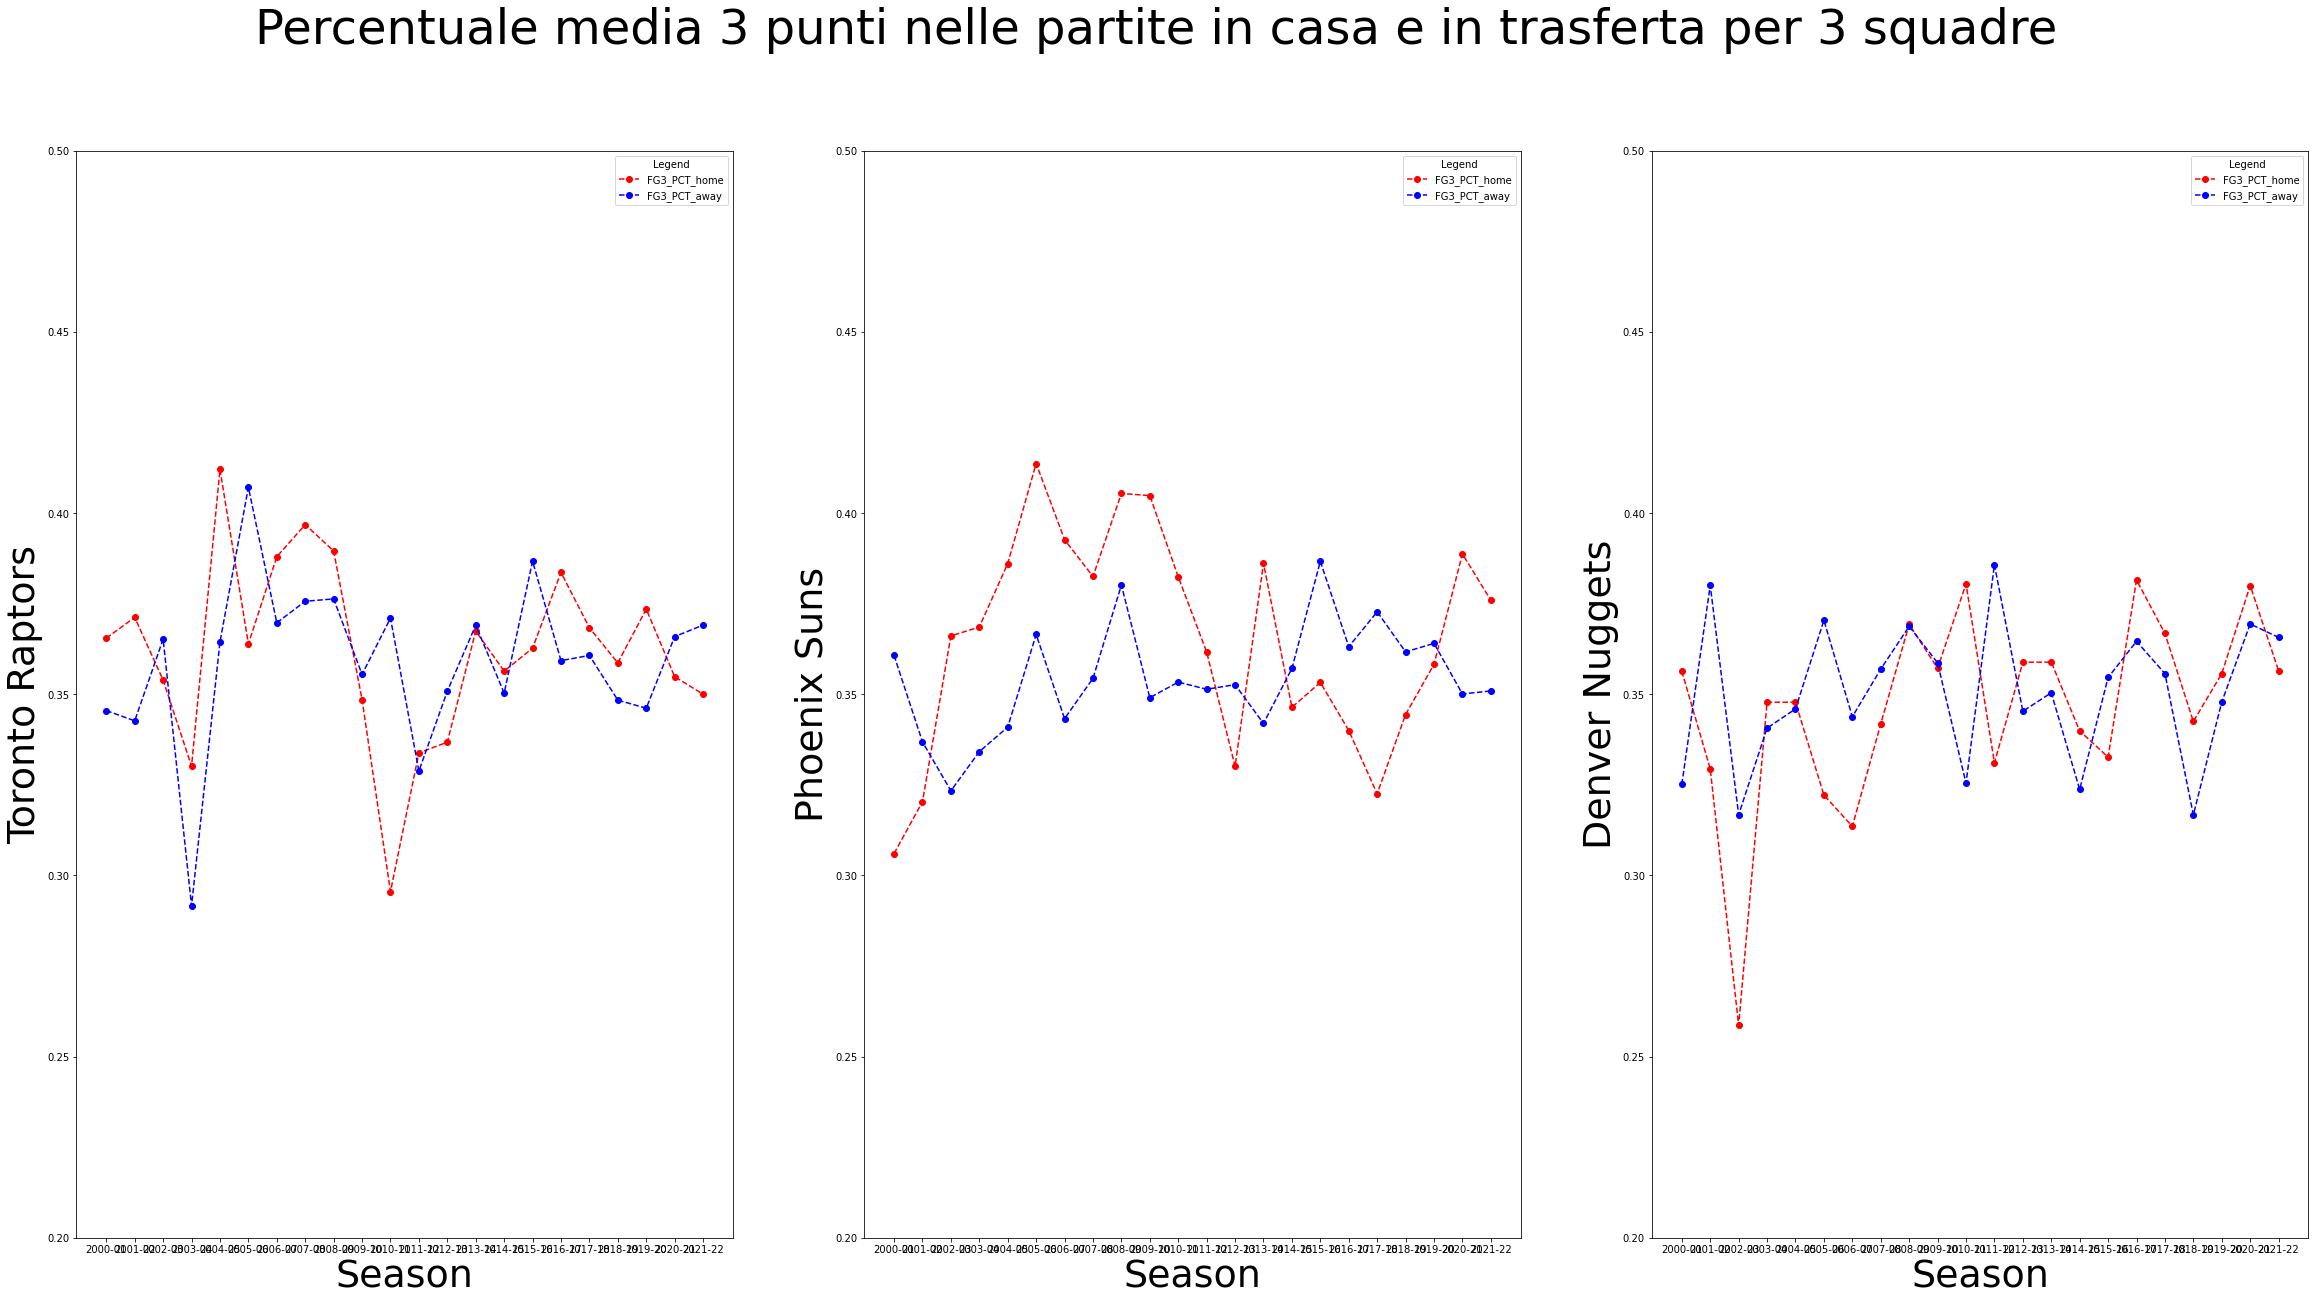

In [ ]:
fig, ax = plt.subplots(figsize=(40,20))
plt.subplot(1, 3, 1)
plt.plot(toronto_raptors['Season'], toronto_raptors['FG3_PCT_home'], linestyle='--', marker='o', color='red')
plt.plot(toronto_raptors['Season'], toronto_raptors['FG3_PCT_away'], linestyle='--', marker='o', color='blue')
legend = plt.legend(['FG3_PCT_home','FG3_PCT_away'], title = "Legend")
plt.ylabel('Toronto Raptors', fontsize=38)
plt.xlabel('Season', fontsize=38)
plt.ylim([0.2, 0.5])

plt.subplot(1, 3, 2)
plt.plot(phoenix_suns['Season'], phoenix_suns['FG3_PCT_home'], linestyle='--', marker='o', color='red')
plt.plot(phoenix_suns['Season'], phoenix_suns['FG3_PCT_away'], linestyle='--', marker='o', color= 'blue')
legend = plt.legend(['FG3_PCT_home','FG3_PCT_away'], title = "Legend")
plt.ylabel('Phoenix Suns', fontsize=38)
plt.xlabel('Season', fontsize=38)
plt.ylim([0.2, 0.5])

plt.subplot(1, 3, 3)
plt.plot(denver_nuggets['Season'], denver_nuggets['FG3_PCT_home'], linestyle='--', marker='o', color='red')
plt.plot(denver_nuggets['Season'], denver_nuggets['FG3_PCT_away'], linestyle='--', marker='o', color= 'blue')
legend = plt.legend(['FG3_PCT_home','FG3_PCT_away'], title = "Legend")
plt.ylabel('Denver Nuggets', fontsize=38)
plt.xlabel('Season', fontsize=38)
plt.ylim([0.2, 0.5])

fig.suptitle('Percentuale media 3 punti nelle partite in casa e in trasferta per 3 squadre', fontsize=48)
plt.savefig("Percentuale media 3 punti per 3 squadre.png")

In [ ]:
### AST

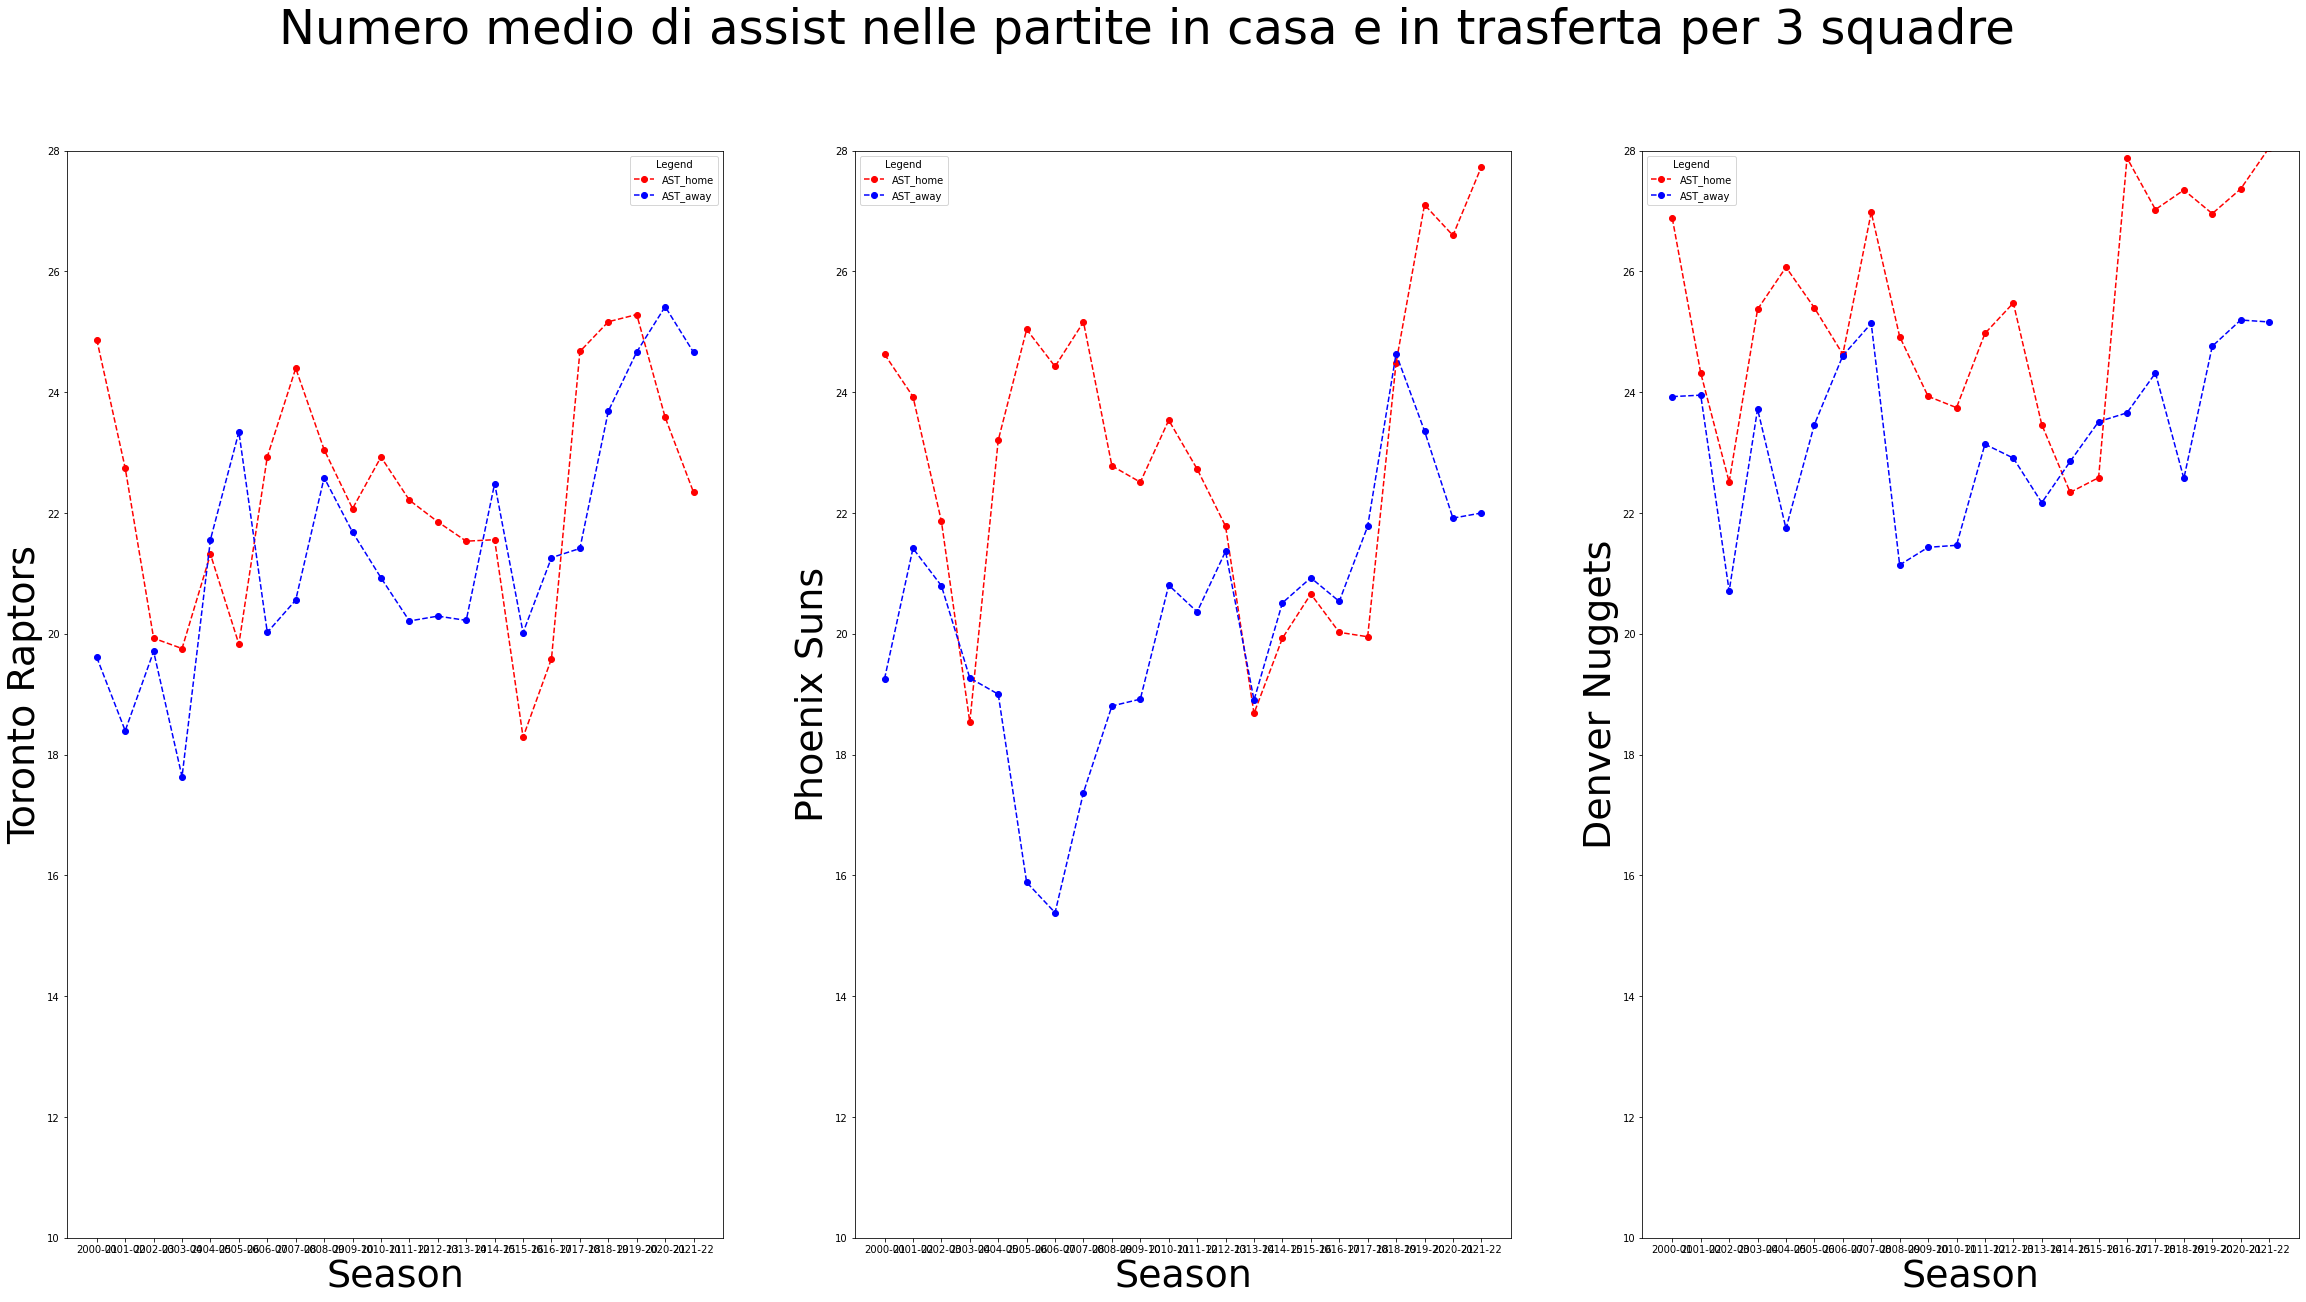

In [ ]:
fig, ax = plt.subplots(figsize=(40,20))
plt.subplot(1, 3, 1)
plt.plot(toronto_raptors['Season'], toronto_raptors['AST_home'], linestyle='--', marker='o', color='red')
plt.plot(toronto_raptors['Season'], toronto_raptors['AST_away'], linestyle='--', marker='o', color='blue')
legend = plt.legend(['AST_home','AST_away'], title = "Legend")
plt.ylabel('Toronto Raptors', fontsize=38)
plt.xlabel('Season', fontsize=38)
plt.ylim([10, 28])

plt.subplot(1, 3, 2)
plt.plot(phoenix_suns['Season'], phoenix_suns['AST_home'], linestyle='--', marker='o', color='red')
plt.plot(phoenix_suns['Season'], phoenix_suns['AST_away'], linestyle='--', marker='o', color='blue')
legend = plt.legend(['AST_home','AST_away'], title = "Legend")
plt.ylabel('Phoenix Suns', fontsize=38)
plt.xlabel('Season', fontsize=38)
plt.ylim([10, 28])

plt.subplot(1, 3, 3)
plt.plot(denver_nuggets['Season'], denver_nuggets['AST_home'], linestyle='--', marker='o', color='red')
plt.plot(denver_nuggets['Season'], denver_nuggets['AST_away'], linestyle='--', marker='o', color='blue')
legend = plt.legend(['AST_home','AST_away'], title = "Legend")
plt.ylabel('Denver Nuggets', fontsize=38)
plt.xlabel('Season', fontsize=38)
plt.ylim([10, 28])

fig.suptitle('Numero medio di assist nelle partite in casa e in trasferta per 3 squadre', fontsize=48)
plt.savefig("Numero medio di assist per 3 squadre.png")